In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os

In [17]:
!pip install imbalanced-learn==0.5.0
!pip install scikit-learn==0.22.1
!pip install tensorflow==2.1.0
!pip install scikit-plot

     |████████████████████████████████| 173 kB 679 kB/s eta 0:00:01
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.0
    Uninstalling imbalanced-learn-0.8.0:
      Successfully uninstalled imbalanced-learn-0.8.0
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 11.0 MB 784 kB/s eta 0:00:01    |█                               | 348 kB 517 kB/s eta 0:00:21
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 120.8 MB 28 kB/s  eta 0:00:01   |██                              | 7.3 MB 733 kB/s eta 0:02:35     |██████

In [18]:
path = 'CSV/channels/EEG Fpz-Cz/data/'
files = glob.glob(path+"/*.csv")
print(files)
li = []
df = pd.DataFrame()
for f in files:
    #csv = pd.read_csv(f)
    #df = df.append(csv)
    df = pd.read_csv(f)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)
print(df)

['CSV/channels/EEG Fpz-Cz/data/SC4022E0-PSG.edf.csv', 'CSV/channels/EEG Fpz-Cz/data/SC4172E0-PSG.edf.csv', 'CSV/channels/EEG Fpz-Cz/data/SC4161E0-PSG.edf.csv', 'CSV/channels/EEG Fpz-Cz/data/SC4031E0-PSG.edf.csv', 'CSV/channels/EEG Fpz-Cz/data/SC4191E0-PSG.edf.csv', 'CSV/channels/EEG Fpz-Cz/data/SC4102E0-PSG.edf.csv', 'CSV/channels/EEG Fpz-Cz/data/SC4052E0-PSG.edf.csv', 'CSV/channels/EEG Fpz-Cz/data/SC4182E0-PSG.edf.csv', 'CSV/channels/EEG Fpz-Cz/data/SC4041E0-PSG.edf.csv', 'CSV/channels/EEG Fpz-Cz/data/SC4111E0-PSG.edf.csv', 'CSV/channels/EEG Fpz-Cz/data/SC4192E0-PSG.edf.csv', 'CSV/channels/EEG Fpz-Cz/data/SC4101E0-PSG.edf.csv', 'CSV/channels/EEG Fpz-Cz/data/SC4051E0-PSG.edf.csv', 'CSV/channels/EEG Fpz-Cz/data/SC4181E0-PSG.edf.csv', 'CSV/channels/EEG Fpz-Cz/data/SC4042E0-PSG.edf.csv', 'CSV/channels/EEG Fpz-Cz/data/SC4112E0-PSG.edf.csv', 'CSV/channels/EEG Fpz-Cz/data/SC4021E0-PSG.edf.csv', 'CSV/channels/EEG Fpz-Cz/data/SC4171E0-PSG.edf.csv', 'CSV/channels/EEG Fpz-Cz/data/SC4162E0-PSG.ed

In [7]:
print(df.isnull().sum())

average_amplitude_change    0
variance                    0
std                         0
sum_square_root             0
crest_factor                0
skew                        0
kurtosis                    0
stage                       0
dtype: int64


In [8]:
df.describe()

average_amplitude_change      variance           std  sum_square_root  \
count              4.230800e+04  42308.000000  42308.000000     42308.000000   
mean               5.000535e-05    427.819801     18.346966        13.955757   
std                9.648879e-03    511.066686      9.550433         7.593737   
min               -7.757836e-02     16.160223      4.019978         3.186650   
25%               -4.474360e-03    130.127942     11.407363         8.613849   
50%               -4.768372e-10    249.216135     15.786580        11.725896   
75%                4.596866e-03    536.153900     23.154996        17.378739   
max                9.075083e-02   6767.708000     82.266080        68.653813   

       crest_factor          skew      kurtosis         stage  
count  42308.000000  42308.000000  42308.000000  42308.000000  
mean       4.308616      0.034213      1.594696      2.041671  
std        0.997014      0.348738      1.953087      1.308542  
min        1.471251     -3.926562     -1.734267      0.000000  
25%        3.640985     -0.137017      0.359692      1.000000  
50%        4.178073      0.043231      1.055905      2.000000  
75%        4.830474      0.213450      2.232064      3.000000  
max       16.661867      3.331974     46.564037      4.000000

<AxesSubplot:xlabel='stage', ylabel='count'>

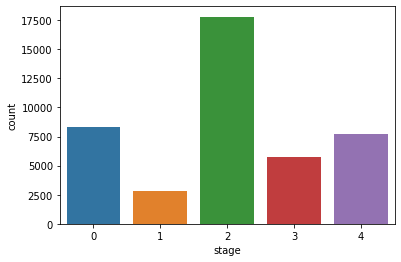

In [9]:
sns.countplot(x="stage", data=df)

In [10]:
tagert_encoding = df['stage']

In [11]:
df['stage'].value_counts()

2    17799
0     8285
4     7717
3     5703
1     2804
Name: stage, dtype: int64

In [12]:
df2 = df.drop('stage',axis=1)

In [10]:
#!pip install category_encoders
#import category_encoders as ce
#column4=df2.columns
#encoder4 = ce.TargetEncoder(cols=[x for x in column4])
#target_encoding=np.array(tagert_encoding)
#target_encoder_all= encoder4.fit_transform(df2,target_encoding)

In [13]:
one_hot_r=pd.get_dummies(df2, prefix_sep='_', drop_first=False)
target5=np.array(one_hot_r)
X = df2
y = np.array(tagert_encoding)
print(X.shape,y.shape)

(42308, 7) (42308,)


In [11]:
#from sklearn.preprocessing import RobustScaler
#transformer = RobustScaler().fit(X)
#X = transformer.transform(X)

In [12]:
#from sklearn.decomposition import PCA
#pca = PCA()
#pca.fit(X)
#cumsum = np.cumsum(pca.explained_variance_ratio_)
#d = np.argmax(cumsum >= 0.99999) + 1
#print(d)

In [13]:
#pca = PCA(n_components=d)
#X = pca.fit_transform(X)

In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

TypeError: __init__() got an unexpected keyword argument 'ratio'

In [19]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
X_resampled, y_resampled, idx_resampled = rus.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [20]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)
print(X_ros.shape, y_ros.shape)

(22100, 7) (22100,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [21]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [22]:
X_sm1, y_sm1 =pd.DataFrame(X_sm), pd.DataFrame (y_sm)
X_rus1, y_rus1 =pd.DataFrame(X_resampled), pd.DataFrame (y_resampled)  
X_tl1, y_tl1  =pd.DataFrame(X_tl), pd.DataFrame (y_tl)
X_ros1, y_ros1  =pd.DataFrame(X_ros), pd.DataFrame (y_ros) 

In [23]:
df5 = pd.concat([X_sm1,X_tl1])
print(df5.shape)
target5 = pd.concat([y_sm1,y_tl1])
print(target5.shape)

(22312, 7)
(22312, 1)


In [24]:

from matplotlib import pyplot as plt

In [25]:
target5.value_counts()

2    8251
1    5289
4    3444
0    2828
3    2500
dtype: int64

In [26]:
name = ['0','1','2','3','4']
balance_tar = [2828,5289,8251,2500,3444]

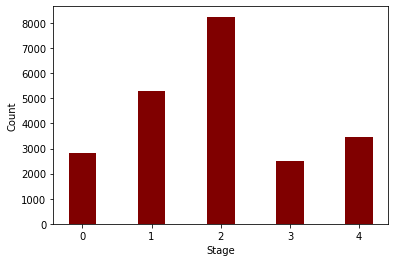

In [27]:
plt.bar(name,balance_tar, color ='maroon',
        width = 0.4)
plt.xlabel("Stage")
plt.ylabel("Count")
plt.show()

In [28]:
pd.DataFrame(y_rus1).value_counts()

4    869
3    869
2    869
1    869
0    869
dtype: int64

In [29]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
target_combined = enc.fit_transform(target5).toarray()
print(target_combined.shape)

(22312, 5)


In [30]:
target_combined1=pd.get_dummies(y_rus1, prefix_sep='_', drop_first=False)
target_combined1 = np.array(target_combined1)
df6 = np.array(df5) 
print(target_combined1.shape)

(4345, 1)


In [31]:
print(df5.shape)
print(target_combined.shape)

(22312, 7)
(22312, 5)


In [32]:
import time
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [33]:
from sklearn.model_selection import train_test_split
train_set, test_set,target_train,target_test = train_test_split(np.array(df5),np.array(target5), test_size=0.3,random_state=21)
#train_set, test_set,target_train,target_test = train_test_split(X_cc, y_cc, test_size=0.3,random_state=0)
print(target_train.shape,target_test.shape)
print(test_set.shape)
print(train_set.shape)

(15618, 1) (6694, 1)
(6694, 7)
(15618, 7)


In [34]:
from xgboost import XGBClassifier

In [42]:
from sklearn.metrics import accuracy_score
model=XGBClassifier(n_estimators=41,max_depth=110,learning_rate=0.7)
model.fit(train_set, target_train)
y_pred_trainsm_rnd = model.predict(train_set)
y_predsm_rnd = model.predict(test_set)
accuracy_trainsm = accuracy_score(target_train, y_pred_trainsm_rnd)
accuracysm = accuracy_score(target_test, y_predsm_rnd)
print("Accuracysm of XGB classifier: %.2f%%" % (accuracysm * 100.0))
print("Accuracy trainsm of XGB classifier: %.2f%%" % (accuracy_trainsm * 100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracysm of XGB classifier: 89.80%
Accuracy trainsm of XGB classifier: 100.00%


In [73]:
from sklearn.linear_model import LogisticRegression

In [80]:
log_clf = LogisticRegression(penalty='l2',max_iter=10000,C=1,solver='lbfgs',l1_ratio=None)

In [81]:

log_clf.fit(train_set, target_train)
y_pred_trainsm_rnd =log_clf.predict(train_set)
y_predsm_rnd =log_clf.predict(test_set)
accuracy_trainsm = accuracy_score(target_train, y_pred_trainsm_rnd)
accuracysm = accuracy_score(target_test, y_predsm_rnd)
print("Accuracysm of LogisticRegression classifier: %.2f%%" % (accuracysm * 100.0))
print("Accuracy trainsm of LogisticRegression  classifier: %.2f%%" % (accuracy_trainsm * 100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracysm of LogisticRegression classifier: 59.44%
Accuracy trainsm of LogisticRegression  classifier: 58.64%


In [36]:
from sklearn.svm import SVC

In [37]:
svm_model=SVC(C=3.4000000000000004, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=2, gamma='scale',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
svm_model.fit(train_set, target_train)
y_pred_trainsm_rnd = svm_model.predict(train_set)
y_predsm_rnd = svm_model.predict(test_set)
accuracy_trainsm = accuracy_score(target_train, y_pred_trainsm_rnd)
accuracysm = accuracy_score(target_test, y_predsm_rnd)
print("Accuracysm of SVM model: %.2f%%" % (accuracysm * 100.0))
print("Accuracy trainsm ofSVM model: %.2f%%" % (accuracy_trainsm * 100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracysm of SVM model: 54.35%
Accuracy trainsm ofSVM model: 53.75%


In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
RandomForest=RandomForestClassifier(max_depth=80,max_features=3,min_samples_leaf=3,min_samples_split=12,n_estimators=40)

In [44]:
RandomForest.fit(train_set, target_train)
y_pred_trainsm_rnd = RandomForest.predict(train_set)
y_predsm_rnd = RandomForest.predict(test_set)
accuracy_trainsm = accuracy_score(target_train, y_pred_trainsm_rnd)
accuracysm = accuracy_score(target_test, y_predsm_rnd)
print("Accuracysm of random_forest: %.2f%%" % (accuracysm * 100.0))
print("Accuracy trainsm of random_forest: %.2f%%" % (accuracy_trainsm * 100.0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracysm of random_forest: 80.55%
Accuracy trainsm of random_forest: 93.07%


In [45]:
import tensorflow as tf
from tensorflow import nn
from tensorflow import keras
from tensorflow.python.keras.layers import Input, Dense, Dropout,Conv1D,MaxPooling1D,Activation,Flatten,AveragePooling1D,GlobalMaxPooling1D,ZeroPadding1D, BatchNormalization, GlobalAveragePooling1D
from tensorflow.python.keras.models import Sequential
from tensorflow import keras
from keras import layers

In [46]:
from keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

In [47]:
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

In [88]:
model = Sequential()
model.add(layer=Conv1D(filters=31, kernel_size=3, activation='tanh',data_format='channels_last',padding='same'))
model.add(layer=Conv1D(filters=64, kernel_size=4, activation='swish',data_format='channels_last',padding='same'))
model.add(layer=AveragePooling1D(pool_size=2))
model.add(layer=Dropout(rate=0.25))
model.add(layer=Flatten())

In [85]:
X_CNN = np.array(df5).reshape(np.array(df5).shape[0], np.array(df5).shape[1],1)
print(X_CNN.shape)

(22312, 7, 1)


In [86]:
X_CNN = np.array(X_CNN)

In [89]:
data = model.predict(X_CNN)

In [90]:
X_trainsm, X_testsm, y_trainsm, y_testsm = train_test_split(data,np.array(target5), test_size=0.5, random_state=5)
print(X_trainsm.shape, X_testsm.shape, y_trainsm.shape, y_testsm.shape)

(11156, 192) (11156, 192) (11156, 1) (11156, 1)


In [91]:
model=XGBClassifier(n_estimators=40,max_depth=40,learning_rate=0.8)

In [92]:
model.fit(X_trainsm, y_trainsm)
y_pred_trainsm = model.predict(X_trainsm)
y_predsm = model.predict(X_testsm)
accuracy_trainsm = accuracy_score(y_trainsm, y_pred_trainsm)
accuracysm = accuracy_score(y_testsm, y_predsm)
print("Accuracysm of CNN + XGB: %.2f%%" % (accuracysm * 100.0))
print("Accuracy trainsm CNN+XGB: %.2f%%" % (accuracy_trainsm * 100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracysm of CNN + XGB: 83.00%
Accuracy trainsm CNN+XGB: 100.00%


In [67]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 41, num = 5)]
# Number of features to consider at every split
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
learning_rate=[0.001,0.01,0.1,0.2,0.3,0.5,0.0001,0.5,0.7]
max_depth.append(None)
# Minimum number of samples required to split a node
# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate}
print(random_grid)

{'n_estimators': [1, 11, 21, 31, 41], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.0001, 0.5, 0.7]}


In [69]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_trainsm, y_trainsm)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  8.0min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.8, max_delta_step=0,
                                           max_depth=40, min_child_weight=1,
                                           missing=None, n_estimators=40,
                                           n_jobs=1, nthread=None,
                                           objective='multi:softprob',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sca...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [70]:
rf_random.best_params_

{'learning_rate': 0.2, 'max_depth': 100, 'n_estimators': 41}

In [71]:
model=XGBClassifier(n_estimators=100,max_depth=41,learning_rate=0.2)

In [72]:
model.fit(X_trainsm, y_trainsm)
y_pred_trainsm = model.predict(X_trainsm)
y_predsm = model.predict(X_testsm)
accuracy_trainsm = accuracy_score(y_trainsm, y_pred_trainsm)
accuracysm = accuracy_score(y_testsm, y_predsm)
print("Accuracysm of CNN + XGB: %.2f%%" % (accuracysm * 100.0))
print("Accuracy trainsm CNN+XGB: %.2f%%" % (accuracy_trainsm * 100.0))

Accuracysm of CNN + XGB: 89.17%
Accuracy trainsm CNN+XGB: 100.00%


In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

In [ ]:
probas = model.predict_proba(test_set)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


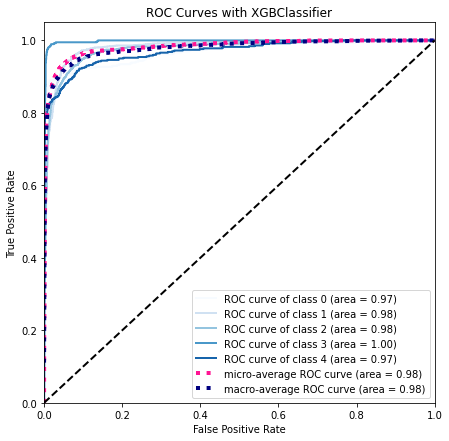

In [ ]:
skplt.metrics.plot_roc_curve(target_test,probas,title="ROC Curves with XGBClassifier", cmap='Blues', figsize=[7,7])
plt.show()

In [ ]:
pred = model.predict(test_set)

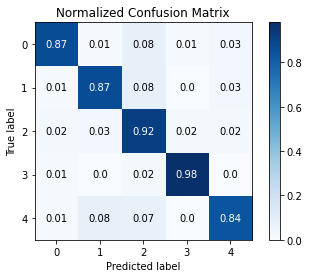

In [ ]:
skplt.metrics.plot_confusion_matrix(target_test,pred, normalize=True, cmap='Blues')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_score(target_test,pred, average='macro')

0.894051880261699

In [ ]:
df5 = pd.concat([X_rus1,X_tl1])
print(df5.shape)
target5 = pd.concat([y_rus1,y_tl1])
print(target5.shape)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
target_combined = enc.fit_transform(target5).toarray()
print(target_combined.shape)

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set,target_train,target_test = train_test_split(np.array(df5),np.array(target_combined), test_size=0.3,random_state=21)
#train_set, test_set,target_train,target_test = train_test_split(X_cc, y_cc, test_size=0.3,random_state=0)
print(target_train.shape,target_test.shape)
print(test_set.shape)
print(train_set.shape)

In [ ]:
train_data=train_set[0:int(train_set.shape[0]*0.8)]
valid_data=train_set[int(train_set.shape[0]*0.8):]
train_target=target_train[0:int(train_set.shape[0]*0.8)]
valid_target=target_train[int(train_set.shape[0]*0.8):]

In [ ]:
train_data= train_data.astype('float64')
valid_data = valid_data.astype('float64')
train_target = train_target.astype('float64')
valid_target = valid_target.astype('float64')

In [ ]:
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import nn
from tensorflow import keras
from tensorflow.python.keras.layers import Input, Dense, Dropout,Conv1D,MaxPooling1D,Activation,Flatten,AveragePooling1D,GlobalMaxPooling1D,ZeroPadding1D, BatchNormalization, GlobalAveragePooling1D
from tensorflow.python.keras.models import Sequential
from tensorflow import keras
from keras import layers

In [ ]:
from keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

In [ ]:
from keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

In [ ]:
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

In [ ]:
train_data= train_data.astype('float32')
valid_data = valid_data.astype('float32')
train_target = train_target.astype('float32')
valid_target = valid_target.astype('float32')

In [ ]:
from keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

In [ ]:
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

In [ ]:
train_data= train_data.astype('float32')
valid_data = valid_data.astype('float32')
train_target = train_target.astype('float32')
valid_target = valid_target.astype('float32')

In [ ]:
import tensorflow as tf
early_stopping_cb =  tf.keras.callbacks.EarlyStopping(patience=100000,
restore_best_weights=True)
lr_scheduler1 = tf.keras.callbacks.ReduceLROnPlateau(factor=0.333, patience=10000)


In [ ]:
import tensorflow as tf
import os,datetime
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
model1 = Sequential()
model1.add(layer=Conv1D(filters=34, kernel_size=13, activation='tanh',data_format='channels_last',padding='same'))
model1.add(layer=Conv1D(filters=66, kernel_size=5, activation='swish',data_format='channels_last',padding='same'))
model1.add(layer=Conv1D(filters=1, kernel_size=5,strides=2, activation='swish',data_format='channels_last',padding='same'))
model1.add(layer=Dropout(rate=0.25))
model1.add(layer=Flatten())
model1.add(layer=Dense(units=100, activation='tanh'))
model1.add(layer= BatchNormalization())
model1.add(layer=Dropout(rate=0.25))
model1.add(layer=Dense(units=100, activation='tanh'))
model1.add(layer= BatchNormalization())
model1.add(layer=Dropout(rate=0.35))
model1.add(layer=Dense(units=5, activation='softmax'))

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model1, to_file='model1.png')

In [ ]:
train_set=train_set.reshape(train_set.shape[0],train_set.shape[1],1)
test_set=test_set.reshape(test_set.shape[0],test_set.shape[1],1)

In [ ]:
from tensorflow import keras
from tensorflow import keras
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[1, 7]),
keras.layers.BatchNormalization(),
keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.01)),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.20),
keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.01)),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.20),
keras.layers.Dense(units=5,activation='softmax')])

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model2.png')

In [ ]:
model.summary()

In [ ]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.1,beta_1=0.9, beta_2=0.999, epsilon=1e-07)

In [ ]:
model.compile(optimizer='nadam', loss='categorical_crossentropy',metrics=['accuracy'])  
history = model.fit(x=train_set , y=target_train, batch_size=2048, epochs=100000, verbose=2,validation_split=0.2,callbacks=[lr_scheduler1, early_stopping_cb])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 12))
plt.grid(True)
plt.gca().set_xlim(0, 100000)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel('number of epochs', fontsize=14)
plt.ylabel('accuracy and loss', fontsize=14)
plt.show()